Episode 0, Reward: 19.0
Episode 10, Reward: 23.0
Episode 20, Reward: 43.0
Episode 30, Reward: 14.0
Episode 40, Reward: 39.0
Episode 50, Reward: 20.0
Episode 60, Reward: 79.0
Episode 70, Reward: 15.0
Episode 80, Reward: 11.0
Episode 90, Reward: 10.0
Episode 100, Reward: 9.0
Episode 110, Reward: 8.0
Episode 120, Reward: 9.0
Episode 130, Reward: 12.0
Episode 140, Reward: 12.0
Episode 150, Reward: 9.0
Episode 160, Reward: 10.0
Episode 170, Reward: 8.0
Episode 180, Reward: 10.0
Episode 190, Reward: 8.0
Episode 200, Reward: 9.0
Episode 210, Reward: 9.0
Episode 220, Reward: 12.0
Episode 230, Reward: 10.0
Episode 240, Reward: 9.0
Episode 250, Reward: 10.0
Episode 260, Reward: 8.0
Episode 270, Reward: 10.0
Episode 280, Reward: 10.0
Episode 290, Reward: 9.0
Episode 300, Reward: 9.0
Episode 310, Reward: 11.0
Episode 320, Reward: 10.0
Episode 330, Reward: 11.0
Episode 340, Reward: 9.0
Episode 350, Reward: 9.0
Episode 360, Reward: 10.0
Episode 370, Reward: 10.0
Episode 380, Reward: 8.0
Episode 390,

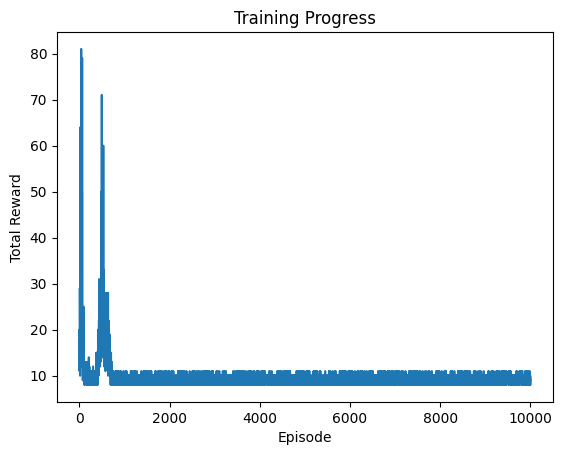

In [14]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import gym
import matplotlib.pyplot as plt

# Actor Critic Network
class ActorCritic(nn.Module):
    def __init__(self, num_inputs, num_actions, hidden_size=128):
        super(ActorCritic, self).__init__()
        self.common = nn.Sequential(
            nn.Linear(num_inputs, hidden_size),
            nn.ReLU()
        )
        self.actor = nn.Sequential(
            nn.Linear(hidden_size, num_actions),
            nn.Softmax(dim=-1)
        )
        self.critic = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.common(x)
        return self.actor(x), self.critic(x)


# Training function
def train(env_name='CartPole-v1', num_episodes=10000, gamma=0.99, lr=0.001):
    env = gym.make(env_name)
    num_inputs = env.observation_space.shape[0]
    num_actions = env.action_space.n

    model = ActorCritic(num_inputs, num_actions)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    all_rewards = []
    episode_rewards = []

    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            action_probs, value = model(torch.tensor(state, dtype=torch.float32))
            action_dist = torch.distributions.Categorical(action_probs)
            action = action_dist.sample()
            next_state, reward, done, _ = env.step(action.item())

            advantage = reward + (1 - done) * gamma * model(torch.tensor(next_state, dtype=torch.float32))[1].detach() - value.detach()

            actor_loss = -action_dist.log_prob(action) * advantage
            critic_loss = advantage.pow(2)

            loss = actor_loss + 0.5 * critic_loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            state = next_state
            total_reward += reward

        episode_rewards.append(total_reward)
        all_rewards.append(total_reward)

        if episode % 10 == 0:
            print(f"Episode {episode}, Reward: {total_reward}")

    env.close()

    # Plotting rewards
    plt.plot(all_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Training Progress')
    plt.show()

if __name__ == "__main__":
    train()
